In [1]:
import json
with open('term_frequency.json') as f:
    top_terms = json.load(f)

In [2]:
len(top_terms)

2731

In [3]:
top_terms = {k: {} for k in top_terms}

In [4]:
from models import *
for post in Post.select():
    if not post.message:
        continue
    for sentence in post.message.split('\t'):
        for word in sentence.split(' '):
            if word in top_terms:
                k = post.time[0:10]
                if k in top_terms[word]:
                    top_terms[word][k] += 1
                else:
                    top_terms[word][k] = 1

In [5]:
from collections import Counter
times = []
for post in Post.select():
    if post.message:
        times.append(post.time[0:10])
time_counts = Counter(times)
for word in top_terms:
    for time in top_terms[word]:
        top_terms[word][time] /= time_counts[time]

In [6]:
from datetime import datetime
import pandas as pd
start = datetime(2015, 10, 17)
end = datetime(2016, 1, 16)
index = pd.date_range(start, end)

In [7]:
top_terms_with_peak = {}
one_day = pd.Timedelta('1 days')
for k in top_terms:
    s = pd.Series(top_terms[k])
    s.index = pd.DatetimeIndex(s.index)
    s = s.reindex(index, fill_value=0)
    peak = s[s > (s.mean() + 2 * s.std())]
    for d1 in peak.index:
        d2 = d1 + one_day
        d3 = d2 + one_day
        if d2 in peak.index and d3 in peak.index:
            top_terms_with_peak[k] = s
            print(k, end=' ')
            break

朱立倫 總統 選票 監督 反對 選 不斷 投票 夜 國際 穩定 1月 16日 消息 傷害 賠償 1 14 懇請 公開 大眾 現狀 下 中國 28 施政 一定 不要 競選 公車 困難 標準 造勢 能源 辯論 自信 開心 冷 元旦 堅定 關懷 部落 辯論會 抗議 進行 非 技術 31 22 憲政 報告 人選 交流 登記 頂 人物 經營 何 新加坡 恐怖 證所稅 年金 預計 團體 簽署 多少 取消 領導人 食品 衝 尊嚴 政黨票 拜託 黃安 選情 馬習會 表 馬 黑箱 食安 二十 柯 關 陳建仁 抹黑 11月 等於 廠 投給 過半 工人 出力 馬習 屬 聲明 馬英九 會面 習近平 協議 見面 停止 安排 握 鬥陣 叫做 舉行 聖誕 故宮 南院 前往 KMT 資產 陣營 ② 交換 婚姻 頂新 藝人 知 購 破壞 地位 ① 黑心 軍宅 無罪 板橋區 116 

In [20]:
len(top_terms_with_peak)

128

In [27]:
meaningful = {
    '朱立倫': 1, '總統': 3, '選票': 12, '監督': 3, '投票': 13, '夜': 13,
    '國際': 3, '傷害': 3, '賠償': 11, '現狀': 3, '中國': 3, '標準': 6,
    '能源': 7, '辯論': 10, '自信': 1, '堅定': 13, '部落': 1, '辯論會': 10,
    '抗議': 3, '憲政': 3, '報告': 3, '人選': 5, '交流': 3, '登記': 6,
    '頂': 6, '人物': 1, '經營': 7, '新加坡': 3, '恐怖': 4, '證所稅': 5,
    '年金': 8, '簽署': 3, '取消': 1, '領導人': 3, '食品': 6, '衝': 7,
    '尊嚴': 3, '拜託': 13, '黃安': 13, '馬習會': 3, '表': 3, '馬': 3,
    '黑箱': 3, '食安': 6, '關': 5, '陳建仁': 5, '廠': 5, '投給': 13,
    '過半': 12, '工人': 5, '出力': 1, '馬習': 3, '屬': 3, '聲明': 3,
    '馬英九': 3, '會面': 3, '習近平': 3, '協議': 3, '見面': 3, '停止': 3,
    '安排': 3, '握': 3, '鬥陣': 3, '舉行': 3, '故宮': 10, '南院': 10,
    '前往': 3, '②': 10, '交換': 3, '頂新': 8, '藝人': 5, '購': 7,
    '地位': 3, '①': 10, '黑心': 6, '軍宅': 8, '無罪': 6
}
len(meaningful)

77

In [33]:
groups = [[], [], [], [], [], [], [], [], [], [], [], [], []]
for k, v in meaningful.items():
    groups[v-1].append(k)
for group in groups:
    print(group)

['朱立倫', '自信', '部落', '人物', '取消', '出力']
[]
['總統', '監督', '國際', '傷害', '現狀', '中國', '抗議', '憲政', '報告', '交流', '新加坡', '簽署', '領導人', '尊嚴', '馬習會', '表', '馬', '黑箱', '馬習', '屬', '聲明', '馬英九', '會面', '習近平', '協議', '見面', '停止', '安排', '握', '鬥陣', '舉行', '前往', '交換', '地位']
['恐怖']
['人選', '證所稅', '關', '陳建仁', '廠', '工人', '藝人']
['標準', '登記', '頂', '食品', '食安', '黑心', '無罪']
['能源', '經營', '衝', '購']
['年金', '頂新', '軍宅']
[]
['辯論', '辯論會', '故宮', '南院', '②', '①']
['賠償']
['選票', '過半']
['投票', '夜', '堅定', '拜託', '黃安', '投給']


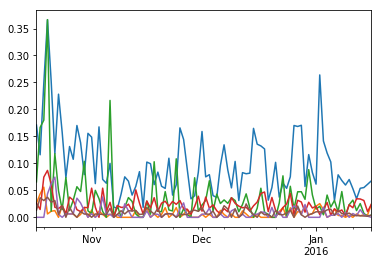

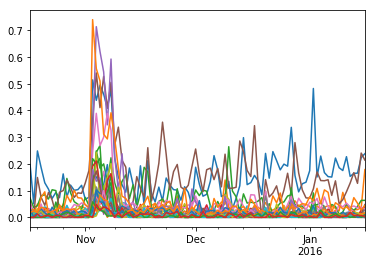

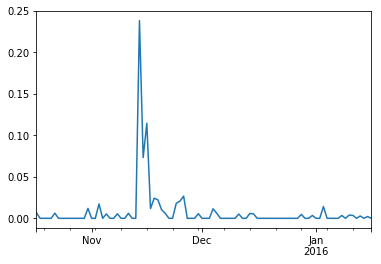

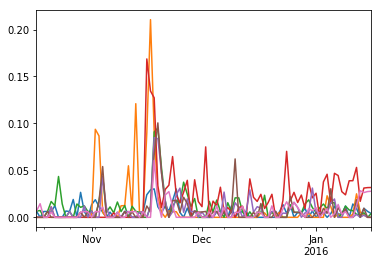

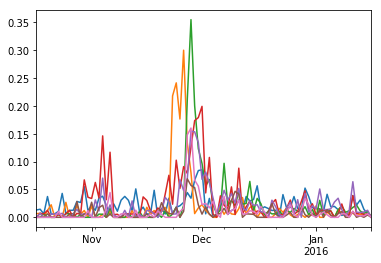

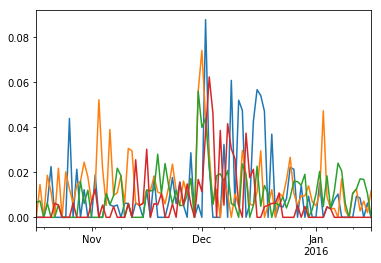

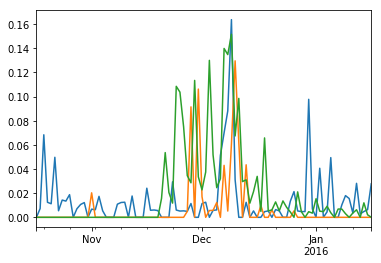

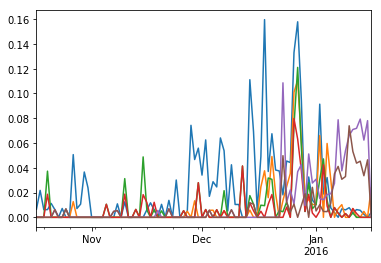

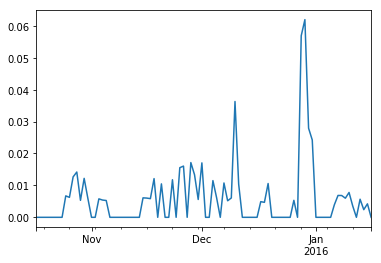

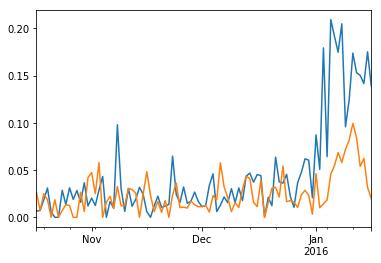

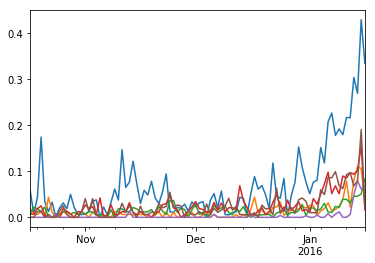

In [34]:
from matplotlib import pyplot
for group in groups:
    for word in group:
        top_terms_with_peak[word].plot()
    if len(group) > 0:
        pyplot.show()